In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from six.moves import cPickle as pickle
from six.moves import range
%matplotlib inline
print(tf.__version__)

Using TensorFlow backend.


1.12.0


In [2]:
pickle_file = './complete_dataset.pickle'

with open(pickle_file, 'rb') as f:
    save = pickle.load(f)
    train_images = save['train_dataset']
    train_labels = save['train_labels']
    test_images = save['test_dataset']
    test_labels = save['test_labels']
    del save  # hint to help gc free up memory
    print('Training set', train_images.shape, train_labels.shape)
    print('Test set', test_images.shape, test_labels.shape)

image_size = 62
num_labels = 12
num_channels = 1

def reformat(dataset, labels):
    dataset = dataset.reshape(
        (-1,image_size, image_size, num_channels)).astype(np.float32)
    labels = (np.arange(num_labels) == labels[:,None]).astype(np.float32)
    return dataset, labels


#train_dataset, train_labels = reformat(train_images, train_labels)
#test_dataset, test_labels = reformat(test_images, test_labels)
#print('Training set', train_images.shape,train_labels.shape)
#print('Test set', test_images.shape, test_labels.shape)

('Training set', (5430, 62, 62, 3), (5430,))
('Test set', (3375, 62, 62, 3), (3375,))


In [3]:
class_names = {0:'ant_man',1:'aqua_man',2:'avengers',3:'bat_man',4:'black_panther',5:'captain_america',6:'cat_woman',7:'ghostrider',
                8:'hulk',9:'iron_man',10:'spider_man',11:'super_man'}

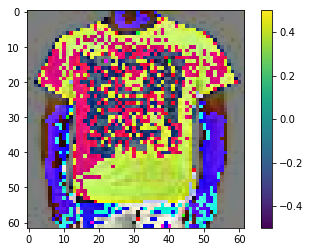

In [4]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)

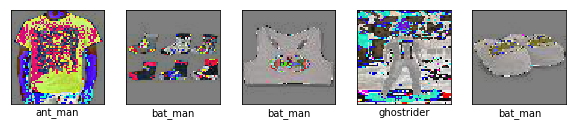

In [5]:
plt.figure(figsize=(10,10))
for i in range(5):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

In [6]:
batch_size = 128
nb_classes = 12
nb_epoch = 500

img_rows, img_cols = 62, 62


model = Sequential()

model.add(Convolution2D(128, 3, 3, border_mode='same', init='he_normal', activation = 'relu', input_shape=(img_rows, img_cols,3)))
#model.add(Convolution2D(128, 3, 3, border_mode='same', init='he_normal', activation = 'relu'))
 
model.add(MaxPooling2D(pool_size=(2, 2)))
     
model.add(Convolution2D(256, 3, 3, border_mode='same', init='he_normal', activation = 'relu'))
#model.add(Convolution2D(256, 3, 3, border_mode='same', init='he_normal', activation = 'relu'))
 
model.add(MaxPooling2D(pool_size=(2, 2)))
     
model.add(Convolution2D(512, 3, 3, border_mode='same', init='he_normal', activation = 'relu'))
#model.add(Convolution2D(512, 3, 3, border_mode='same', init='he_normal', activation = 'relu'))
#model.add(Convolution2D(512, 3, 3, border_mode='same', init='he_normal', activation = 'relu'))
 
model.add(MaxPooling2D(pool_size=(2, 2)))
 
model.add(Flatten())
model.add(Dense(4096, init='he_normal', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, init='he_normal', activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, init='he_normal', activation = 'softmax'))


 

 
    
model.compile(optimizer=tf.train.AdamOptimizer(0.01), 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=20,batch_size=128)    

/Users/aananya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), kernel_initializer="he_normal", activation="relu", input_shape=(62, 62, 3..., padding="same")`
/Users/aananya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), padding="same", activation="relu", kernel_initializer="he_normal")`
/Users/aananya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same", activation="relu", kernel_initializer="he_normal")`
/Users/aananya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), padding="same", activation="relu", kernel_initializer="he_normal")`
/Users/aananya/anaconda/lib/python2.7/site-packages/ipykernel/__main_

Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead


/Users/aananya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4096, activation="relu", kernel_initializer="he_normal")`
/Users/aananya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(4096, activation="relu", kernel_initializer="he_normal")`
/Users/aananya/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:31: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(12, activation="softmax", kernel_initializer="he_normal")`


Epoch 1/20
5430/5430 [==============================] - 1652s - loss: 13.3345 - acc: 0.1551     